### Data Generation

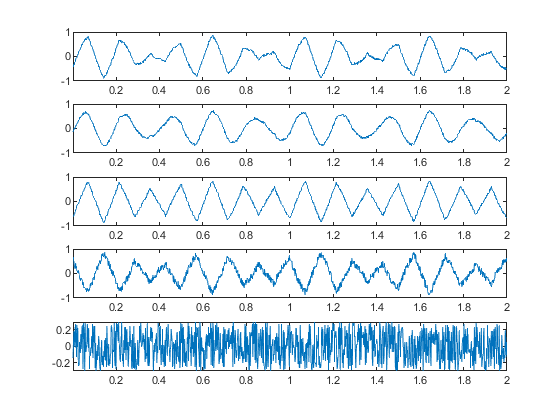

In [8]:
%% Author: Lu, Chia-Feng 2013.11.28
clear, close all
clc

%% initialize parameters
path(path,'.\fastica_25');  % add FastICA path

samplerate=500; % in Hz
N=1000; % data length

freq1=5; % in Hz
freq2=7; % in Hz
taxis=[1:N]/samplerate;

ICNo=3;  % the specified number of independent components
PCNo=3;  % the preserved number of PCs 

%% generate test signals 
C1 = 0.75*sin(2*pi*freq1*taxis);        % 1st component: a sine wave
C2 = sawtooth(2*pi*freq2*taxis,0.5);    % 2nd component: a triangular wave

% Combine data in different proportions
X(1,:) = 0.5*C1 + 0.5*C2 + 0.1*rand(1,N);
X(2,:) = 0.7*C1 + 0.2*C2 + 0.1*rand(1,N);
X(3,:) = 0.2*C1 + 0.7*C2 + 0.1*rand(1,N);
X(4,:) = -0.3*C1 - 0.6*C2 + 0.3*rand(1,N);
X(5,:) = 0.6*rand(1,N);    % Noise only

% Center data by subtracting mean
X = X - mean(X,2)*ones(1,N);

figure, 
for i=1:size(X,1)
    subplot(size(X,1),1,i)
    plot(taxis,X(i,:)),xlim([taxis(1) taxis(end)])
end

### ICA analysis using FastICA

In [1]:
%% Independent Components Analysis using FastICA
[icasig, A, W] = fastica(X,'numOfIC',ICNo,'displayMode','off','firstEig',1,'lastEig',PCNo); % fast ICA

% [icasig, A, W] = fastica(X,'numOfIC',ICNo,'displayMode','off','interactivePCA','on'); % fast ICA
% fasticag(X)  % used the correct number of PCA can always produce good results
% [icasig, A, W] = fastica (X)


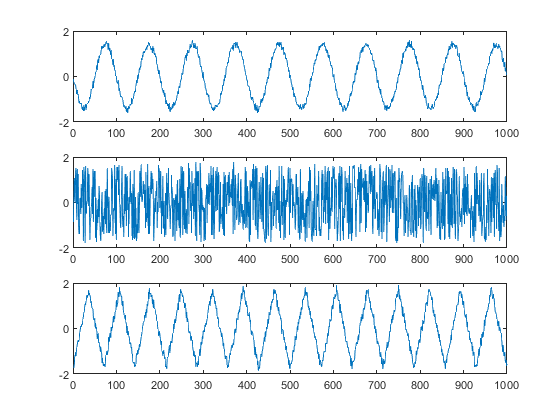

In [16]:
figure,
for i=1:size(icasig,1)
    subplot(size(icasig,1),1,i),plot(icasig(i,:))
end

return

### Reconstruct the signal with the two idependent componnent

In [17]:
%% reconstruct signal
rejectICA=2;
% reconstruct the signal
A2=A;
icasig2=icasig;
A2(:,rejectICA)=[];
icasig2(rejectICA,:)=[];

newX=(A2*icasig2);


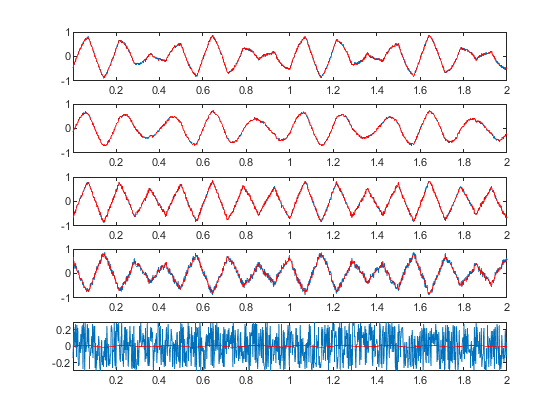

In [19]:
figure, 
for i=1:size(newX,1)
    subplot(size(newX,1),1,i)
    plot(taxis,X(i,:)),xlim([taxis(1) taxis(end)]), hold on
    plot(taxis,newX(i,:),'r'),xlim([taxis(1) taxis(end)])
end